In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plt the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot the class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor='black'
                   )

    # highlight test examples 
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(x=X_test[:, 0],
                    y=X_test[:, 1],
                    alpha=0.8,
                    linewidth=1,
                    c='none',
                    marker='o',
                    label="Test set",
                    edgecolor='black'
                   )
    

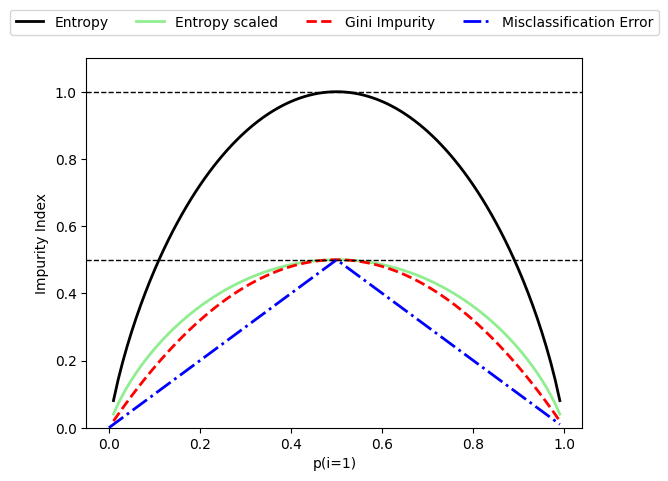

In [8]:
# Visualizing entropy WRT p(i|t)
import numpy as np
import matplotlib.pyplot as plt
def entropy(p):
    return -p * np.log2(p) - (1-p) * np.log2((1-p))

def gini(p):
    return (1 - p * p - (1-p) * (1-p))

def error(p):
    return (1.0 - np.max([p, 1.0-p]))

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
ent_gi = [gini(p) if p != 0 else None for p in x]
err = [error(i) for i in x]


fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, ent_gi, err],
                         ["Entropy", "Entropy scaled", "Gini Impurity", "Misclassification Error"],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgreen', 'red', 'blue', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor = (0.5,1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y = 0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y = 1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.ylabel('Impurity Index')
plt.xlabel('p(i=1)')

# plt.plot(x, ent)
plt.show()

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

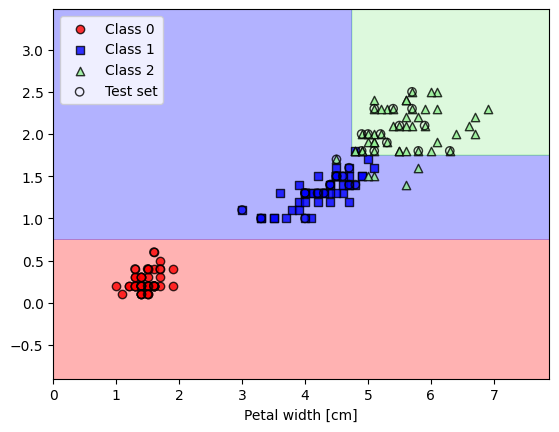

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105,150))

plt.xlabel('Petal length [cm]')
plt.xlabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.show()


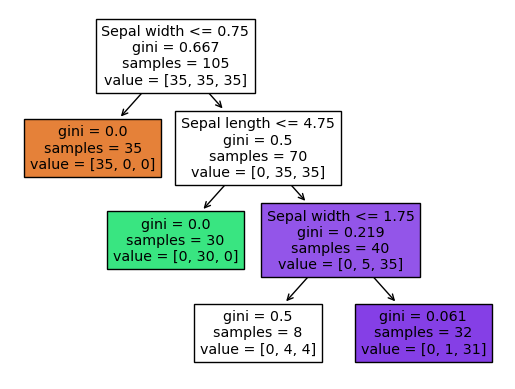

In [16]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
tree.plot_tree(tree_model, feature_names = feature_names, filled=True)
plt.show()

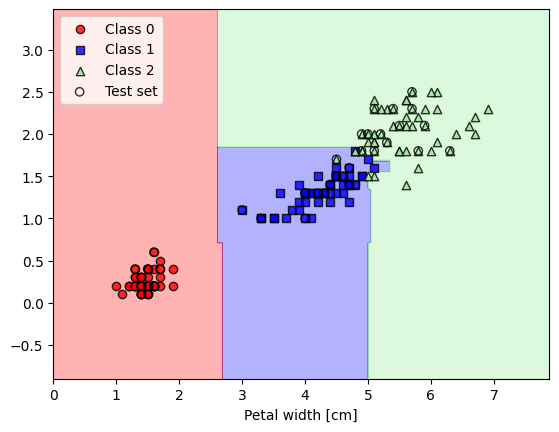

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))

plt.xlabel('Petal length [cm]')
plt.xlabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.show()

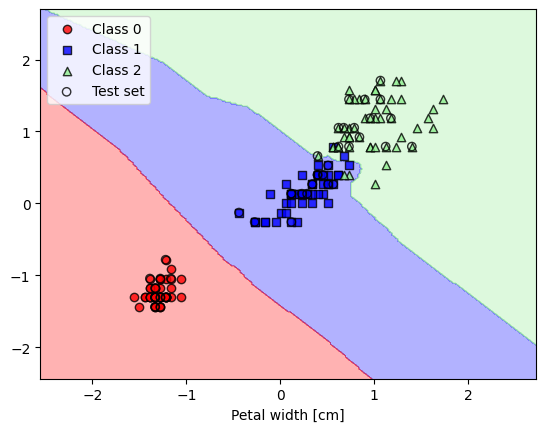

In [19]:
# K-Nearest neighbors 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))

plt.xlabel('Petal length [cm]')
plt.xlabel('Petal width [cm]')
plt.legend(loc='upper left')
plt.show()